In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import make_scorer, r2_score

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures

In [2]:
df_train = pd.read_csv('train.csv')

In [20]:
print('Hello', 'Hi')

Hello Hi


### Analysis on Data

In [4]:
df_train.rename(columns={'Whole weight.1':'Shucked weight', 'Whole weight.2':'Viscera weight'}, inplace=True)

In [5]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Shucked weight  90615 non-null  float64
 7   Viscera weight  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [7]:
df_train.describe()

,id,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df_train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
df_train.duplicated().sum()

0

<Axes: xlabel='Rings'>

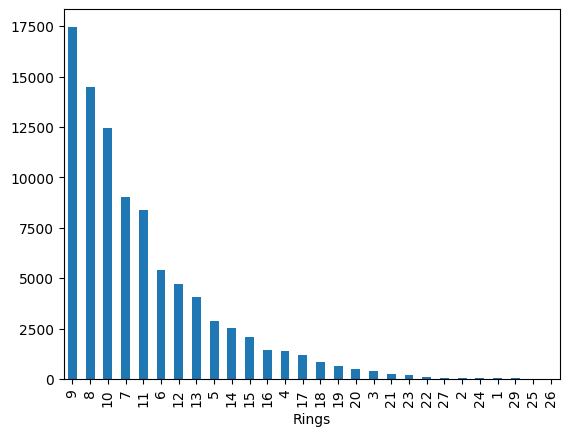

In [10]:
df_train['Rings'].value_counts().plot(kind='bar')

### Encoding and Find Best Model

In [11]:
# Encode categorical variables
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])

In [12]:
# Split data into features and target variable
X = df_train.drop(['id', 'Rings'], axis=1)
y = df_train['Rings']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
def rmsle(y_true, y_pred):
    y_true = np.maximum(y_true, 0)  # Ensure y_true is non-negative
    y_pred = np.maximum(y_pred, 0)  # Ensure y_pred is non-negative
    log_diff = np.log1p(y_pred) - np.log1p(y_true)
    rmsle_error = np.sqrt(np.mean(log_diff ** 2))
    return rmsle_error

In [15]:
rmsle_error = make_scorer(rmsle, greater_is_better=False)

In [16]:
# Define models

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(),
    SVR(),
    XGBRegressor(),
    CatBoostRegressor(verbose=0),
    LGBMRegressor()
]

In [17]:
# Track best model and its RMSLE error
best_model = None
best_model_name = ""
best_rmsle = float('inf')

for model in models:
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmsle_err = rmsle(y_test, y_pred)
    
    print(f"{model.__class__.__name__}: RMSLE: {rmsle_err}")

    if rmsle_err < best_rmsle:
        best_model = model
        best_model_name = model.__class__.__name__
        best_rmsle = rmsle_err

print(f"Best model: {best_model_name}: RMSLE: {best_rmsle}")

LinearRegression: RMSLE: 0.16519886997341646
DecisionTreeRegressor: RMSLE: 0.216118969186171


KeyboardInterrupt: 

In [ ]:
cbr = CatBoostRegressor(verbose=0)

In [ ]:
cbr.fit(X_train, y_train)

In [ ]:
y_pred = cbr.predict(X_test)
r2_score(y_test, y_pred)

### Other Predictions

In [ ]:
X['Meat weight'] = X['Shucked weight'] - X['Viscera weight']

In [ ]:
X_meat = X.drop(['Whole weight', 'Shucked weight'], axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_meat, y, test_size=0.1, random_state=42)

In [ ]:
X_train.head()

In [ ]:
# Track the best model and its RMSLE error
best_model = None
best_model_name = ""
best_rmsle = float('inf')

for model in models:
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmsle_err = rmsle(y_test, y_pred)
    
    print(f"{model.__class__.__name__}: RMSLE: {rmsle_err}")

    if rmsle_err < best_rmsle:
        best_model = model
        best_model_name = model.__class__.__name__
        best_rmsle = rmsle_err

print(f"Best model: {best_model_name}: RMSLE: {best_rmsle}")

### Using Parameters

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X.iloc[:,:8], y, test_size=0.1, random_state=42)

In [ ]:
X_train.head()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer
from tqdm import tqdm
import numpy as np

In [ ]:
# Define RMSLE scorer
def rmsle(y_true, y_pred, constant=1):
    assert len(y_true) == len(y_pred)
    log_diff = np.log1p(y_pred + constant) - np.log1p(y_true + constant)
    rmsle = np.sqrt(np.mean(log_diff ** 2))
    return rmsle
# Make RMSLE scorer
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [ ]:
# Define the models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(),
    SVR(),
    XGBRegressor(),
    CatBoostRegressor(verbose=0),
    LGBMRegressor()
]

In [ ]:
# Define hyperparameters to tune for each model
params = [
    {},  # LinearRegression does not have hyperparameters to tune
    {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    {'learning_rate': [0.01, 0.1, 0.2], 'depth': [4, 6, 8]},
    {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'num_leaves': [31, 50, 100]}
]

In [ ]:
# Perform a grid search for each model
best_models = []
for model, param in tqdm(zip(models, params)):
    grid_search = GridSearchCV(model, param_grid=param, cv=5, scoring=rmsle_scorer)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    print(rmsle(y_test, y_pred))
    print(grid_search.best_estimator_)
    best_models.append(grid_search.best_estimator_)

# Print best models and their parameters
for model, param in tqdm(zip(best_models, params)):
    print(model)
    print(grid_search.best_params_)